56


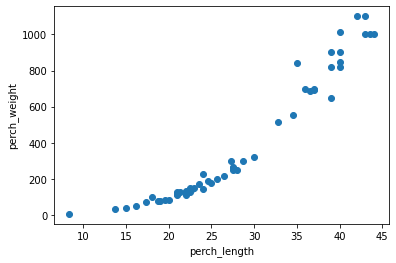

In [4]:
import numpy as np
import matplotlib.pyplot as plt
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length,perch_weight)
plt.xlabel('perch_length')
plt.ylabel('perch_weight')
print(len(perch_length))


In [5]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)
print(len(train_input))

42


In [5]:
a=np.array([1,2,3,4])
print(a.shape)

(4,)


In [24]:
a=a.reshape(2,-1)
print(a)
print(a.shape)

[[1 2]
 [3 4]]
(2, 2)


In [6]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [42]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))
print(knr.score(train_input,train_target))

0.9928094061010639
0.9698823289099255


In [41]:
from sklearn.metrics import mean_absolute_error     #테스트 예측값과 타겟의 절대값 오차의 평균
                                                    #19g 정도 타겟과 다르다.
                                                    

test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


In [37]:
#훈련세트 점수> 테스트세트 점수 = 과대적합
#훈련세트점수<=테스트세트 점수 or 둘다 낮으면 = 과소적합

In [51]:
# 과소적합이면 k이웃의 수를 줄인다
#과대적합이면 k이웃의 수를 늘린다
knr.n_neighbors=3

knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.974645996398761


In [53]:
from sklearn.metrics import mean_absolute_error

test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

35.42380952380951


In [54]:
#---------------연습문제--------------
#--------neighbors의 수가 줄어듦에 따라 그래프가 단순해진다

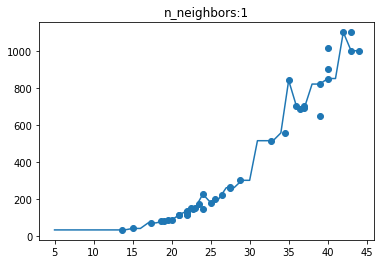

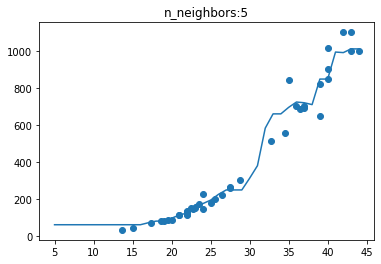

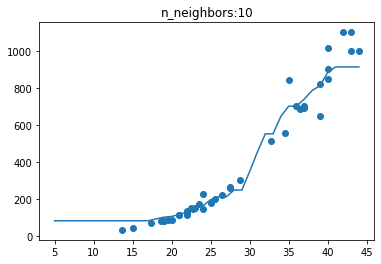

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1)

for n in[1,5,10]:
  knr.n_neighbors=n
  knr.fit(train_input,train_target)
  prediction=knr.predict(x)
  plt.scatter(train_input,train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors:{}'.format(n))
  plt.show()
  